In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
whole = pd.read_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/whol_df.parquet')
whole

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,time
0,0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,None,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:00+00:00
1,1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,None,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:03+00:00
2,2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,None,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:07+00:00
3,3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,None,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:07+00:00
4,4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,None,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...
20692835,4156677,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,None,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-02-29 23:59:32+00:00
20692836,4156678,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,None,None,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-02-29 23:59:39+00:00
20692837,4156679,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,None,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-02-29 23:59:45+00:00
20692838,4156680,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,None,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-02-29 23:59:54+00:00


In [4]:
whole_purchase = whole[whole['event_type']=='purchase']

In [5]:
whole_purchase['time'] = pd.to_datetime(whole_purchase['time']).dt.floor('D')
whole_purchase.info()

<ipython-input-5-a74bb083dace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_purchase['time'] = pd.to_datetime(whole_purchase['time']).dt.floor('D')


<class 'pandas.core.frame.DataFrame'>
Index: 1287007 entries, 202 to 20692724
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   Unnamed: 0     1287007 non-null  int64              
 1   event_time     1287007 non-null  object             
 2   event_type     1287007 non-null  object             
 3   product_id     1287007 non-null  int64              
 4   category_id    1287007 non-null  int64              
 5   category_code  17214 non-null    object             
 6   brand          737314 non-null   object             
 7   price          1287007 non-null  float64            
 8   user_id        1287007 non-null  int64              
 9   user_session   1287007 non-null  object             
 10  time           1287007 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 117.8+ MB


In [ ]:
whole_purchase = whole_purchase.assign(time_max =  whole_purchase['time'].max())
whole_purchase = whole_purchase.assign(r = whole_purchase['time_max'] - whole_purchase['time'])
whole_purchase[r]

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,time,r,time_max
202,202,2019-10-01 00:06:35 UTC,purchase,5619862,1487580006895846315,None,runail,5.32,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01,151 days,2020-02-29
204,204,2019-10-01 00:06:35 UTC,purchase,5619866,1487580006895846315,None,runail,2.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01,151 days,2020-02-29
205,205,2019-10-01 00:06:35 UTC,purchase,5696184,1487580005134238553,None,runail,2.38,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01,151 days,2020-02-29
206,206,2019-10-01 00:06:35 UTC,purchase,5706784,1487580005092295511,None,runail,4.44,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01,151 days,2020-02-29
207,207,2019-10-01 00:06:35 UTC,purchase,5723503,1487580005134238553,None,runail,2.62,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01,151 days,2020-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692507,4156349,2020-02-29 23:46:01 UTC,purchase,5896420,1487580006300255120,None,jessnail,49.21,620865261,64389dba-26c4-f328-6972-166a48654eaa,2020-02-29,0 days,2020-02-29
20692721,4156563,2020-02-29 23:54:44 UTC,purchase,5692863,1487580007910867929,None,yoko,7.83,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e,2020-02-29,0 days,2020-02-29
20692722,4156564,2020-02-29 23:54:44 UTC,purchase,5802432,1487580009286598681,None,None,0.32,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e,2020-02-29,0 days,2020-02-29
20692723,4156565,2020-02-29 23:54:44 UTC,purchase,5896788,1783999068909863670,None,staleks,4.75,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e,2020-02-29,0 days,2020-02-29


In [ ]:
whole_purchase['r'] = whole_purchase['r'].dt.days.astype(int) + 1

In [ ]:
r_df = whole_purchase.groupby('user_id')['r'].min().reset_index()

In [ ]:
f_df = whole_purchase.groupby('user_id')['event_type'].count().reset_index().rename(columns={'event_type':'f'})

In [ ]:
m_df = whole_purchase.groupby('user_id')['price'].sum().reset_index().rename(columns={'price':'m'})

In [ ]:
rfm_df = pd.merge(r_df, f_df, on='user_id')
rfm_df = pd.merge(rfm_df, m_df, on='user_id')
rfm_df

,user_id,r,f,m
0,9794320,97,4,12.68
1,10079204,116,2,25.81
2,10280338,11,86,177.83
3,12055855,72,4,16.54
4,12936739,44,2,29.89
...,...,...,...,...
110513,622065819,1,4,20.48
110514,622066161,1,4,12.95
110515,622067983,1,10,66.48
110516,622069477,1,1,0.95


In [ ]:
rfm_df.to_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/rfm_df.parquet')

In [68]:
rfm_df = pd.read_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/rfm_df.parquet')

In [50]:
rfm_df.set_index('user_id', inplace=True)
rfm_df

,r,f,m
user_id,,,
9794320,97,4,12.68
10079204,116,2,25.81
10280338,11,86,177.83
12055855,72,4,16.54
12936739,44,2,29.89
...,...,...,...
622065819,1,4,20.48
622066161,1,4,12.95
622067983,1,10,66.48


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_df[['r_sc', 'f_sc', 'm_sc']] = scaler.fit_transform(rfm_df[['r', 'f', 'm']])

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


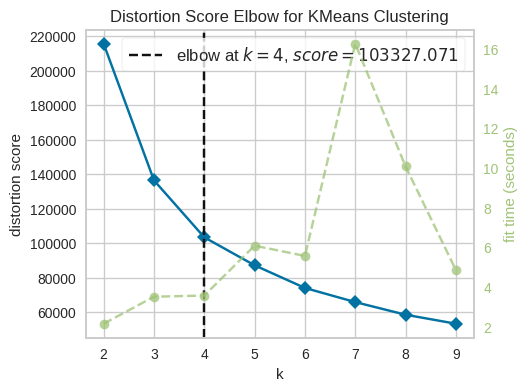

In [ ]:
plt.figure(figsize=(5,4))
kmeans = KMeans(random_state=42, n_init=20)
elbow = KElbowVisualizer(kmeans,k=(2,10))
elbow.fit(rfm_df[['r_sc', 'f_sc', 'm_sc']].values)
elbow.show()
plt.show()

In [52]:
from sklearn.base import clone

param_grid = {
    'n_init' : [20],
    'n_clusters': [4],
    'init': ['k-means++'],  # 초기 중심점 설정 방법을 시도합니다.
    'max_iter': [300],  # 최대 반복 횟수를 다양하게 시도해봅니다.
    'tol': [0.0001, 0.001, 0.01]  # 수렴을 판단하는 임계값을 다양하게 시도해봅니다.
}

# 그리드 서치를 수행합니다.
results = []
for params in ParameterGrid(param_grid):
    kmeans_clone = clone(kmeans)  # 원본 모델을 복제합니다.
    kmeans_clone.set_params(**params)
    kmeans_clone.fit(rfm_df[['r_sc', 'f_sc', 'm_sc']])
    cluster_labels_4 = kmeans_clone.labels_
    silhouette = silhouette_score(rfm_df[['r_sc', 'f_sc', 'm_sc']], cluster_labels_4)  # 실루엣 점수를 계산합니다.
    results.append({'params': params, 'silhouette_score': silhouette, 'cluster_labels_4': cluster_labels_4})

# 최적의 하이퍼파라미터와 실루엣 점수를 출력합니다.
best_result_4 = max(results, key=lambda x: x['silhouette_score'])
print("Best parameters found: ", best_result_4['params'])
print("Best silhouette score: ", best_result_4['silhouette_score'])

Best parameters found:  {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'n_init': 20, 'tol': 0.01}
Best silhouette score:  0.4741004988595125


In [53]:
param_grid = {
    'n_init' : [20],
    'n_clusters': [5],
    'init': ['k-means++'],  # 초기 중심점 설정 방법을 시도합니다.
    'max_iter': [300],  # 최대 반복 횟수를 다양하게 시도해봅니다.
    'tol': [0.0001, 0.001, 0.01]  # 수렴을 판단하는 임계값을 다양하게 시도해봅니다.
}

# 그리드 서치를 수행합니다.
results = []
for params in ParameterGrid(param_grid):
    kmeans_clone = clone(kmeans)  # 원본 모델을 복제합니다.
    kmeans_clone.set_params(**params)
    kmeans_clone.fit(rfm_df[['r_sc', 'f_sc', 'm_sc']])
    cluster_labels_5 = kmeans_clone.labels_
    silhouette = silhouette_score(rfm_df[['r_sc', 'f_sc', 'm_sc']], cluster_labels_5)  # 실루엣 점수를 계산합니다.
    results.append({'params': params, 'silhouette_score': silhouette, 'cluster_labels_5': cluster_labels_5})

# 최적의 하이퍼파라미터와 실루엣 점수를 출력합니다.
best_result_5 = max(results, key=lambda x: x['silhouette_score'])
print("Best parameters found: ", best_result_5['params'])
print("Best silhouette score: ", best_result_5['silhouette_score'])

Best parameters found:  {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 20, 'tol': 0.001}
Best silhouette score:  0.47409300957749634


In [54]:
rfm_df['cluster_4'] = best_result_4['cluster_labels_4']
rfm_df['cluster_5'] = best_result_5['cluster_labels_5']


In [55]:
rfm_df

,r,f,m,r_sc,f_sc,m_sc,cluster_4,cluster_5
user_id,,,,,,,,
9794320,97,4,12.68,0.598321,-0.418562,-0.505004,0,1
10079204,116,2,25.81,1.030956,-0.528059,-0.356860,0,1
10280338,11,86,177.83,-1.359922,4.070791,1.358354,3,2
12055855,72,4,16.54,0.029065,-0.418562,-0.461452,0,0
12936739,44,2,29.89,-0.608503,-0.528059,-0.310826,1,0
...,...,...,...,...,...,...,...,...
622065819,1,4,20.48,-1.587625,-0.418562,-0.416998,1,0
622066161,1,4,12.95,-1.587625,-0.418562,-0.501957,1,0
622067983,1,10,66.48,-1.587625,-0.090073,0.102012,1,0


In [56]:
rfm_df.to_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/rfm_df_cluster.parquet')

In [3]:
rfm_df_cluster = pd.read_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/rfm_df_cluster.parquet')

In [ ]:
rfm_df_cluster

In [59]:
pd.DataFrame(rfm_df_cluster.groupby('cluster_4').agg({'r':['mean', 'min', 'max', 'median'],
                                                    'f':['mean', 'min', 'max', 'median'],
                                                    'm':['mean', 'min', 'max', 'median', 'count'], }))

r                           f                           m  \
                 mean min  max median        mean min  max median        mean   
cluster_4                                                                       
0          109.800427  71  152  107.0    7.420957   1   52    5.0   37.211882   
1           33.647569   1   72   33.0    7.742529   1   42    6.0   39.516873   
2           30.383670   1  148   18.0  124.916594  13  715  111.0  609.415259   
3           45.367497   1  152   34.0   43.386750   1  124   40.0  204.020830   

                                            
              min      max   median  count  
cluster_4                                   
0           -7.20   316.82   27.990  52497  
1          -10.52   252.38   30.720  48052  
2          175.44  3785.03  526.570   1139  
3           27.05   709.46  184.735   8830

In [8]:
pd.DataFrame(rfm_df_cluster.groupby('cluster_5').agg({'r':['mean', 'min', 'max', 'median'],
                                                    'f':['mean', 'min', 'max', 'median'],
                                                    'm':['mean', 'min', 'max', 'median', 'count'], }))

r                           f                  \
                 mean min  max median        mean min  max median   
cluster_5                                                           
0           34.128983   1   72   33.0    7.111417   1   35    5.0   
1          110.411160  73  152  108.0    7.186541   1   52    5.0   
2           47.489529   1  152   38.0   35.660604   1   93   34.0   
3           23.876712   1  138   12.0  234.164384  71  715  210.0   
4           34.802083   1  152   22.0   89.353220   2  252   85.0   

                     m                                   
                  mean     min      max   median  count  
cluster_5                                                
0            36.609429  -10.52   207.94    29.15  46851  
1            36.107698   -7.20   307.14    27.56  51238  
2           167.714456   27.05   575.92   154.51  10171  
3          1198.359178  518.41  3785.03  1014.16    146  
4           427.057836   91.15  1295.80   392.92   2112

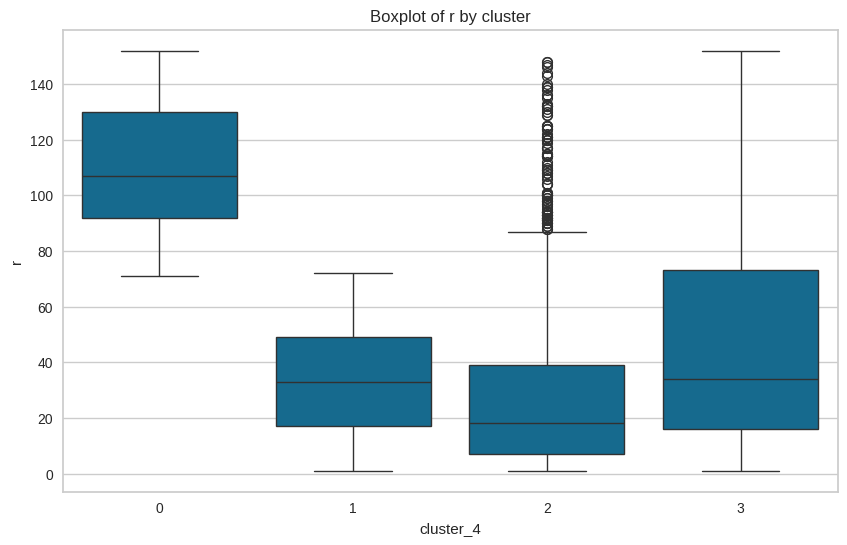

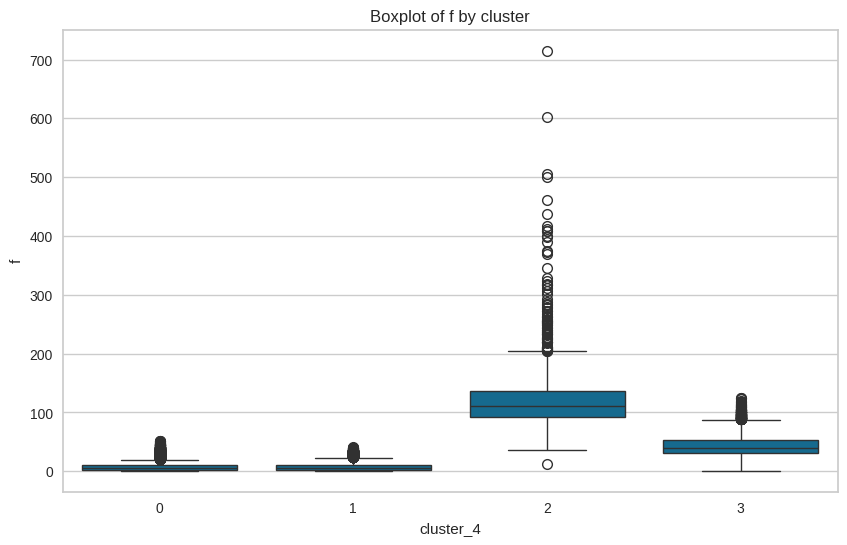

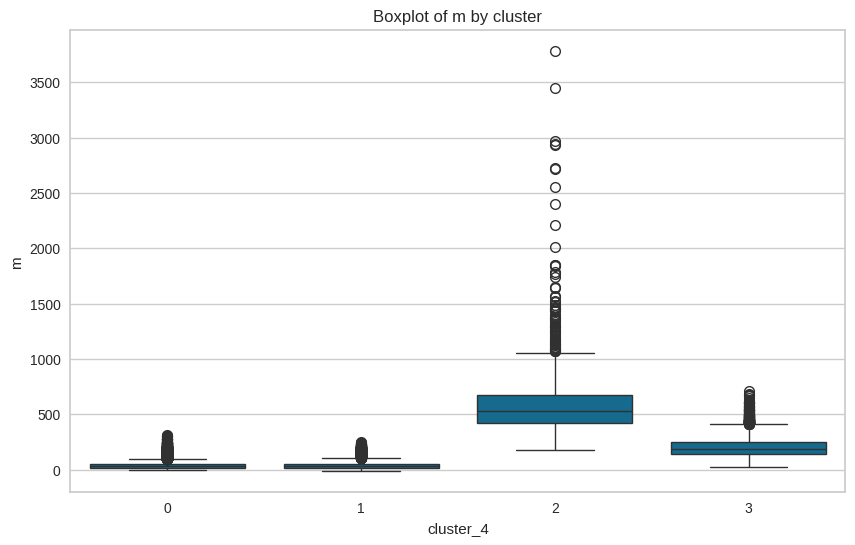

In [61]:
for feature in rfm_df_cluster[['r', 'f', 'm']].columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='cluster_4', y=feature, data=rfm_df_cluster)
  plt.title(f'Boxplot of {feature} by cluster')
  plt.show()

In [63]:
import plotly.graph_objects as go

cluster_colors = {
    0: 'rgb(255, 0, 0)',   # Red
    1: 'rgb(0, 255, 0)',   # Green
    2: 'rgb(0, 0, 255)',   # Blue
    3: 'rgb(255, 255, 0)', # Yellow
    4: 'rgb(255, 0, 255)'  # Magenta
}

fig = go.Figure()

# 클러스터에 따라 색상 지정하여 산점도 추가
for cluster, color in cluster_colors.items():
    cluster_data = rfm_df_cluster['cluster_5'] == cluster
    fig.add_trace(go.Scatter3d(
        x=rfm_df_cluster['r'][cluster_data],
        y=rfm_df_cluster['f'][cluster_data],
        z=rfm_df_cluster['m'][cluster_data],
        mode='markers',
        marker=dict(size=1, color=color),
        name=f'Cluster {cluster}'
    ))

# 레이아웃 설정
fig.update_layout(scene=dict(
    xaxis=dict(title='Recency'),
    yaxis=dict(title='Frequency'),
    zaxis=dict(title='Monetary')
), width=800, height=800)

fig.show()

In [64]:
import plotly.graph_objects as go

cluster_colors = {
    0: 'rgb(255, 0, 0)',   # Red
    1: 'rgb(0, 255, 0)',   # Green
    2: 'rgb(0, 0, 255)',   # Blue
    3: 'rgb(255, 255, 0)', # Yellow
    4: 'rgb(255, 0, 255)'  # Magenta
}

fig = go.Figure()

# 클러스터에 따라 색상 지정하여 산점도 추가
for cluster, color in cluster_colors.items():
    cluster_data = rfm_df_cluster['cluster_4'] == cluster
    fig.add_trace(go.Scatter3d(
        x=rfm_df_cluster['r'][cluster_data],
        y=rfm_df_cluster['f'][cluster_data],
        z=rfm_df_cluster['m'][cluster_data],
        mode='markers',
        marker=dict(size=1, color=color),
        name=f'Cluster {cluster}'
    ))

# 레이아웃 설정
fig.update_layout(scene=dict(
    xaxis=dict(title='Recency'),
    yaxis=dict(title='Frequency'),
    zaxis=dict(title='Monetary')
), width=800, height=800)

fig.show()

In [4]:
def segmenting(rfm_df_cluster):
  if rfm_df_cluster['cluster_5'] == 0:
    return '일반고객'
  if rfm_df_cluster['cluster_5'] == 1:
    return '이탈고객'
  if rfm_df_cluster['cluster_5'] == 2:
    return '중요고객'
  if rfm_df_cluster['cluster_5'] == 3:
    return 'VIP'
  if rfm_df_cluster['cluster_5'] == 4:
    return '우수고객'

rfm_df_cluster['segment'] = rfm_df_cluster.apply(segmenting, axis=1)
rfm_df_cluster

,r,f,m,r_sc,f_sc,m_sc,cluster_4,cluster_5,segment
user_id,,,,,,,,,
9794320,97,4,12.68,0.598321,-0.418562,-0.505004,0,1,이탈고객
10079204,116,2,25.81,1.030956,-0.528059,-0.356860,0,1,이탈고객
10280338,11,86,177.83,-1.359922,4.070791,1.358354,3,2,중요고객
12055855,72,4,16.54,0.029065,-0.418562,-0.461452,0,0,일반고객
12936739,44,2,29.89,-0.608503,-0.528059,-0.310826,1,0,일반고객
...,...,...,...,...,...,...,...,...,...
622065819,1,4,20.48,-1.587625,-0.418562,-0.416998,1,0,일반고객
622066161,1,4,12.95,-1.587625,-0.418562,-0.501957,1,0,일반고객
622067983,1,10,66.48,-1.587625,-0.090073,0.102012,1,0,일반고객


In [11]:
rfm_df_cluster.to_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/rfm_df_cluster.parquet')

In [5]:
whole_merged = whole.merge(rfm_df_cluster[['segment', 'cluster_5']], 'left', 'user_id')

In [6]:
whole_merged[whole_merged['segment'].isnull()]['event_type'].unique()

array(['cart', 'view', 'remove_from_cart'], dtype=object)

In [7]:
whole_merged['segment'] = whole_merged['segment'].fillna('비구매고객')

In [8]:
whole_merged.groupby('segment')['user_id'].nunique().reset_index()

,segment,user_id
0,VIP,146
1,비구매고객,1528840
2,우수고객,2112
3,이탈고객,51238
4,일반고객,46851
5,중요고객,10171


In [10]:
whole_cluster = whole_merged
whole_cluster.to_parquet('/content/drive/MyDrive/코딩 공부 폴더/새 프로젝트/whole_cluster.parquet')

In [9]:
whole_merged_purchase = whole_merged[whole_merged['event_type']=='purchase']
whole_merged_purchase

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,time,segment,cluster_5
202,202,2019-10-01 00:06:35 UTC,purchase,5619862,1487580006895846315,None,runail,5.32,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,이탈고객,1.0
204,204,2019-10-01 00:06:35 UTC,purchase,5619866,1487580006895846315,None,runail,2.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,이탈고객,1.0
205,205,2019-10-01 00:06:35 UTC,purchase,5696184,1487580005134238553,None,runail,2.38,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,이탈고객,1.0
206,206,2019-10-01 00:06:35 UTC,purchase,5706784,1487580005092295511,None,runail,4.44,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,이탈고객,1.0
207,207,2019-10-01 00:06:35 UTC,purchase,5723503,1487580005134238553,None,runail,2.62,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00,이탈고객,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692507,4156349,2020-02-29 23:46:01 UTC,purchase,5896420,1487580006300255120,None,jessnail,49.21,620865261,64389dba-26c4-f328-6972-166a48654eaa,2020-02-29 23:46:01+00:00,중요고객,2.0
20692721,4156563,2020-02-29 23:54:44 UTC,purchase,5692863,1487580007910867929,None,yoko,7.83,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e,2020-02-29 23:54:44+00:00,일반고객,0.0
20692722,4156564,2020-02-29 23:54:44 UTC,purchase,5802432,1487580009286598681,None,None,0.32,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e,2020-02-29 23:54:44+00:00,일반고객,0.0
20692723,4156565,2020-02-29 23:54:44 UTC,purchase,5896788,1783999068909863670,None,staleks,4.75,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e,2020-02-29 23:54:44+00:00,일반고객,0.0


In [31]:
whole_merged_purchase['brand'].nunique()

250

In [18]:
segment_summary = whole_merged_purchase.groupby(['segment']).agg({'user_id' : 'nunique',
                                                                  'price' : 'sum'})
segment_summary['인당평균지출'] = segment_summary['price'] / segment_summary['user_id']
segment_summary['user_id'] = segment_summary['user_id'].astype(int)
segment_summary = segment_summary.rename(columns = {'user_id' : 'user_counts'})
segment_summary['유저비중'] = (segment_summary['user_counts'] / segment_summary['user_counts'].sum()).round(3)
segment_summary['매출비중'] = (segment_summary['price'] / segment_summary['price'].sum()).round(3)
segment_summary

,user_counts,price,인당평균지출,유저비중,매출비중
segment,,,,,
VIP,146,174960.44,1198.359178,0.001,0.028
우수고객,2112,901946.15,427.057836,0.019,0.142
이탈고객,51238,1850086.21,36.107698,0.464,0.291
일반고객,46851,1715188.34,36.609429,0.424,0.270
중요고객,10171,1705823.73,167.714456,0.092,0.269


In [19]:
rfm_df_cluster.groupby('segment').agg({'r':['mean', 'min', 'max', 'median'],
                                                    'f':['mean', 'min', 'max', 'median'],
                                                    'm':['mean', 'min', 'max', 'median'], }).reset_index()

segment           r                           f                  \
                 mean min  max median        mean min  max median   
0     VIP   23.876712   1  138   12.0  234.164384  71  715  210.0   
1    우수고객   34.802083   1  152   22.0   89.353220   2  252   85.0   
2    이탈고객  110.411160  73  152  108.0    7.186541   1   52    5.0   
3    일반고객   34.128983   1   72   33.0    7.111417   1   35    5.0   
4    중요고객   47.489529   1  152   38.0   35.660604   1   93   34.0   

             m                            
          mean     min      max   median  
0  1198.359178  518.41  3785.03  1014.16  
1   427.057836   91.15  1295.80   392.92  
2    36.107698   -7.20   307.14    27.56  
3    36.609429  -10.52   207.94    29.15  
4   167.714456   27.05   575.92   154.51